# PyLab 1 - Numerical Computation
### Author: Ayush Pandhi (1003227457)
### Date: October 4, 2018

In [48]:
#Importing required modules
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [60]:
#Defining constants and parameters
t = 10.0                           # total time interval
period = 0.73                      # period of oscillation
dt = 0.01                          # time step
wo = 2*m.pi/period                 # initial angular frequency
mass = 0.1999                      # mass of the pendulum
k = mass*wo**2                     # constant k value
y_data = np.zeros(int(t/dt))       # y-position
v_data = np.zeros(int(t/dt))       # instantaneous velocity
k_data = np.zeros(int(t/dt))       # kinetic energy
u_data = np.zeros(int(t/dt))       # potential energy
t_range = np.arange(0.0, 10.0, dt) # time interval
tot_energy = np.zeros(int(t/dt))   # total energy
y_data[0]= 0.200                   # initial displacement

In [50]:
#Defining forward euler method with energy computations
def fwdeuler(steps):
    v_data[steps+1] = v_data[steps] - dt*(wo)**2*y_data[steps]
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

#Defining symplectic euler method with energy computations
def symplectic(steps):
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    v_data[steps+1] = v_data[steps] - (dt*k/mass)*y_data[steps+1]
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

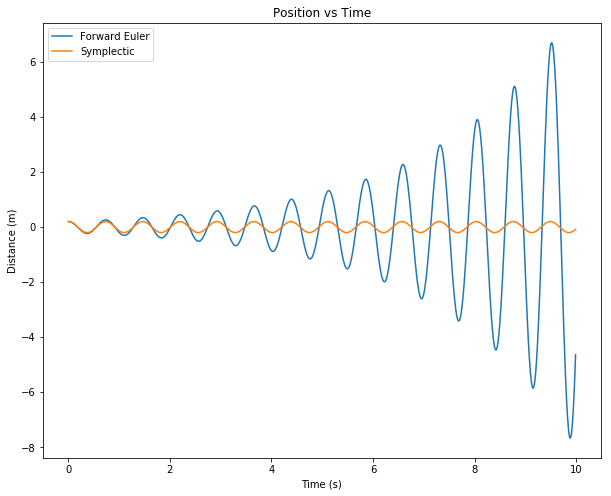

In [51]:
#Plotting position vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, y_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, y_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.savefig('Simulated Position vs Time')
plt.show()

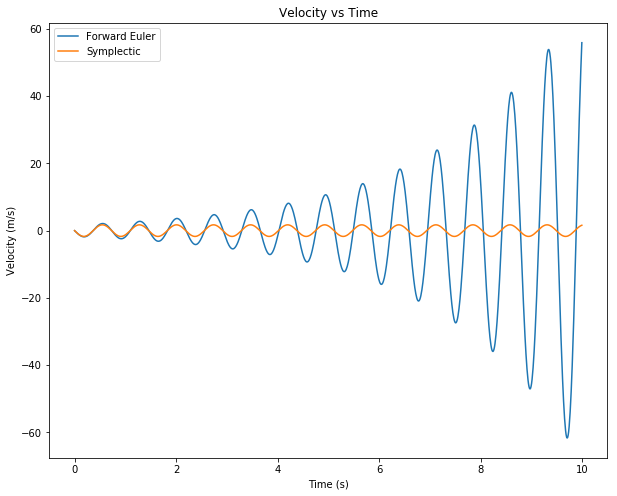

In [52]:
#Plotting velocity vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, v_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, v_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Velocity vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.savefig('Simulated Velocity vs Time')
plt.show()

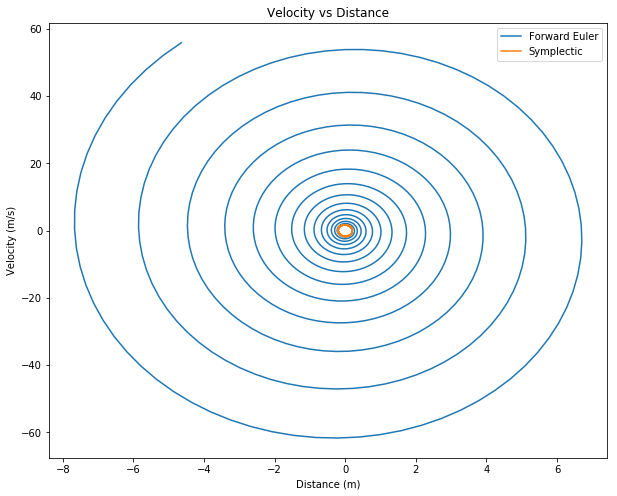

In [53]:
#Plotting velocity vs position phase plot and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(y_data, v_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(y_data, v_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Velocity vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.savefig('Simulated Phase Plot')
plt.show()

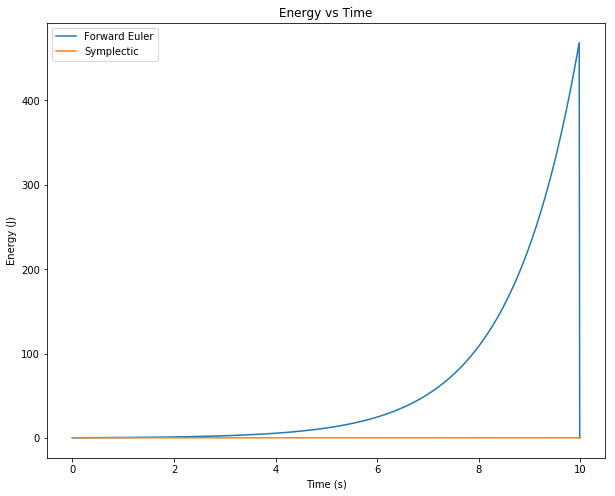

In [54]:
#Plotting energy vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, tot_energy, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, tot_energy, label = 'Symplectic')

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.savefig('Simulated Energy vs Time')
plt.show()

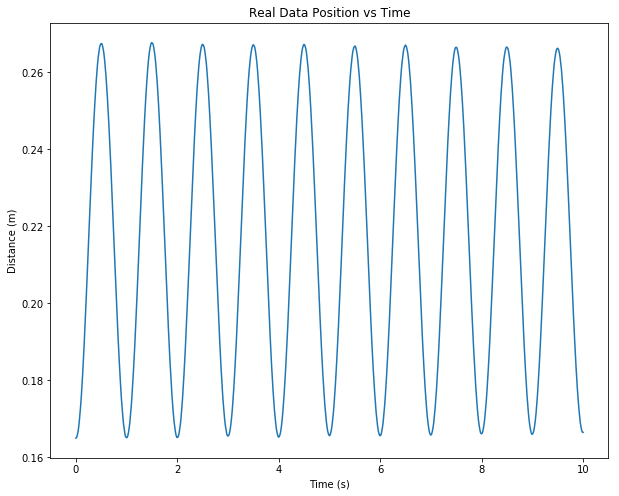

In [55]:
#Loading the experimental data for position vs time
real_data = np.loadtxt('position data.txt', skiprows=2)
real_t, real_y, real_yerror = np.hsplit(real_data, 3)

#Setting figure size
plt.figure(figsize = (10, 8))

#Plotting position vs time for the experimental data
plt.plot(np.linspace(0., 10.0, real_y.shape[0]), real_y/100)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Real Data Position vs Time')
plt.savefig('Real Position vs Time')
plt.show()

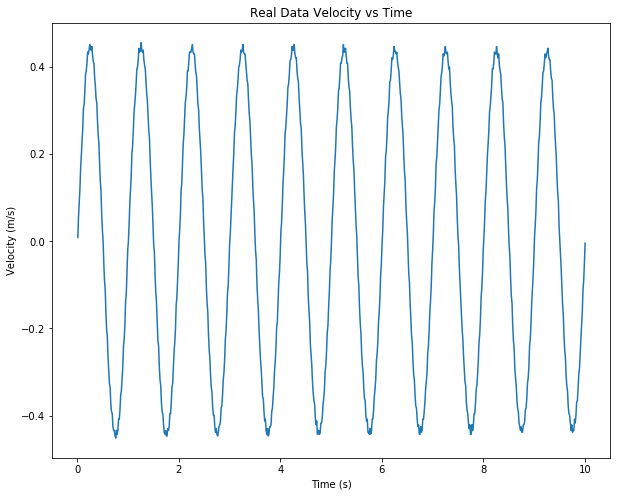

In [56]:
#Loading the experimental data for velocity vs time
real_data2 = np.loadtxt('velocity data.txt', skiprows=2)
real_t, real_v = np.hsplit(real_data2, 2)

#Setting figure size
plt.figure(figsize = (10, 8))

#Plotting velocity vs time for the experimental data
plt.plot(np.linspace(0., 10.0, real_v.shape[0]), real_v/100)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Real Data Velocity vs Time')
plt.savefig('Real Velocity vs Time')
plt.show()

In [57]:
#Re-defining constants and parameters for second experiment
t = 120.0                          # total time interval
period = 0.75                      # period of oscillation
dt = 0.01                          # time step
wo = 2*m.pi/period                 # initial angular frequency
mass = 0.2200                      # mass of the pendulum
k = mass*wo**2                     # constant k value
y_data = np.zeros(int(t/dt))       # y-position
v_data = np.zeros(int(t/dt))       # instantaneous velocity
k_data = np.zeros(int(t/dt))       # kinetic energy
u_data = np.zeros(int(t/dt))       # potential energy
t_range = np.arange(0.0, 120.0, dt) # time interval
tot_energy = np.zeros(int(t/dt))   # total energy
y_data[0]= 0.200      

#Defining the computed gamma from our results
#Mean is 21.76, original amplitude was about 5.3 cm and a*(1/e) is about 1.95 cm which takes about 80 seconds to reach
a_1e = 1.946818003
ta_1e = 80
gamma = 2/ta_1e

#Defining the new integration with dampening
def dampint(steps):
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    v_data[steps+1] = v_data[steps] - dt*((k/mass)*y_data[steps+1]+gamma*v_data[steps])
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

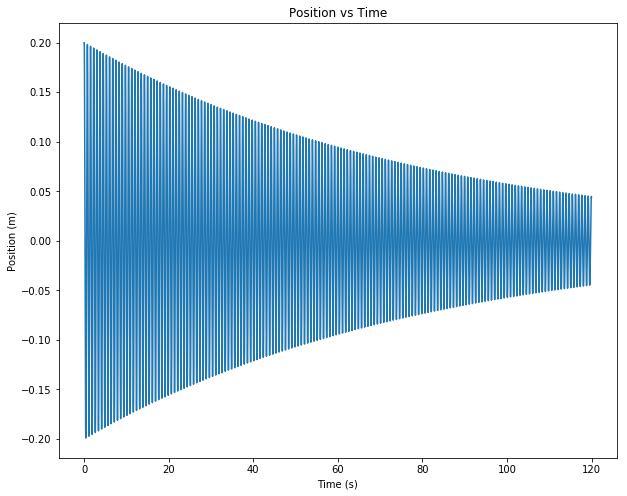

In [58]:
#Plotting position vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0,int(t/dt) - 1):
    dampint(i)
plt.plot(t_range, y_data)

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.savefig('Simulated Damp Position vs Time')
plt.show()

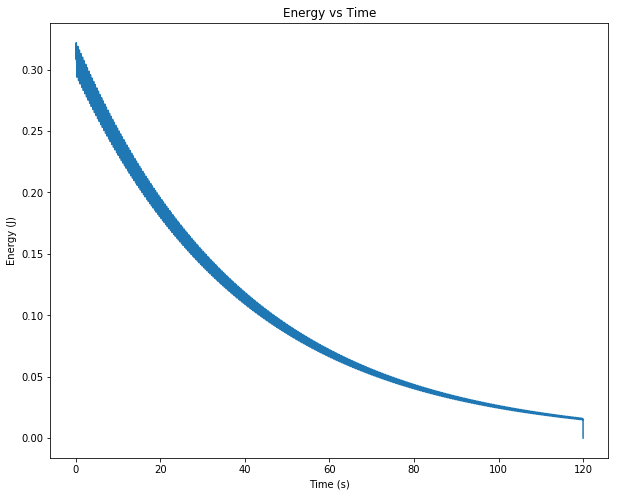

In [59]:
#Plotting energy vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forward Euler Plot
for i in range(0,int(t/dt) -1):
    dampint(i)
plt.plot(t_range, tot_energy)

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.savefig('Simulated Damp Energy vs Time')
plt.show()

Zooming into the previous two plots to see more clearly what is going on


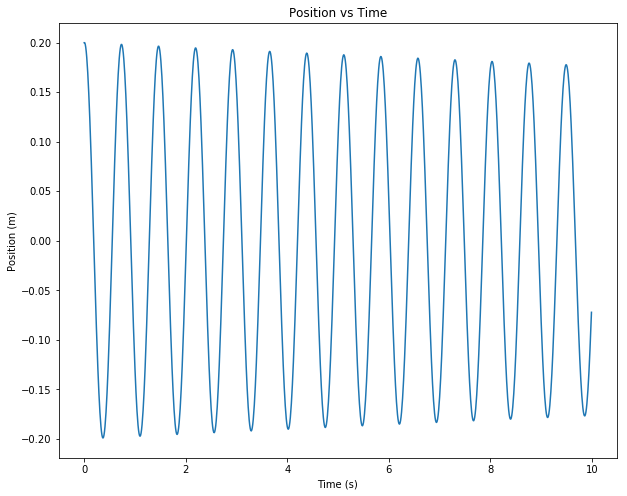

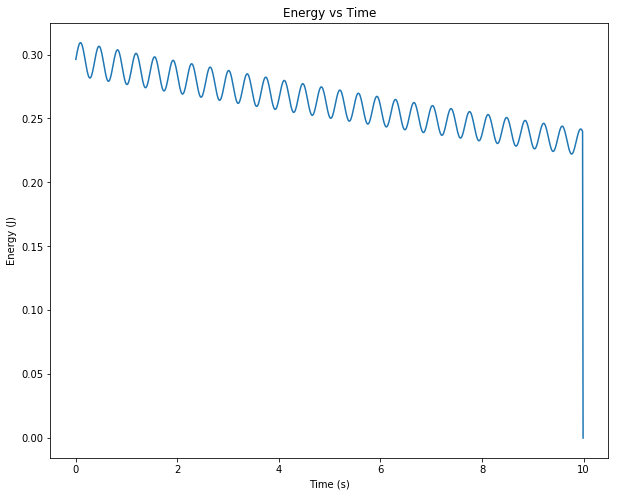

In [61]:
#A closer zoomed in view, these plots were made by changing the initial conditions and constants above
#Specifically the time was set to 10 seconds instead of the full 120 seconds to see individual oscillations

#Plotting position vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0,int(t/dt) - 1):
    dampint(i)
plt.plot(t_range, y_data)

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.savefig('Simulated Damp Position vs Time Zoomed')
plt.show()

#Plotting energy vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forward Euler Plot
for i in range(0,int(t/dt) -1):
    dampint(i)
plt.plot(t_range, tot_energy)

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.savefig('Simulated Damp Energy vs Time Zoomed')
plt.show()

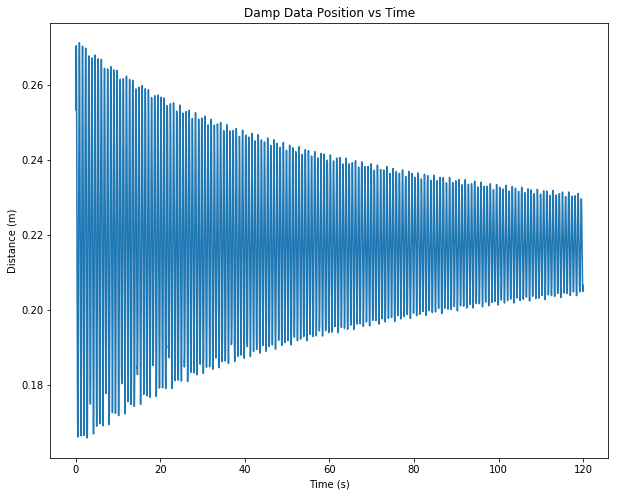

In [62]:
#Loading the damped positin vs time experimental data
damp_data = np.loadtxt('damped position.txt', skiprows=2)
damp_t, damp_y, damp_yerror = np.hsplit(damp_data, 3)

#Setting figure size
plt.figure(figsize = (10, 8))

#Plotting position vs time for the damped experimental data
plt.plot(np.linspace(0., 120.0, damp_y.shape[0]), damp_y/100)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Damp Data Position vs Time')
plt.savefig('Real Damp Position vs Time')
plt.show()

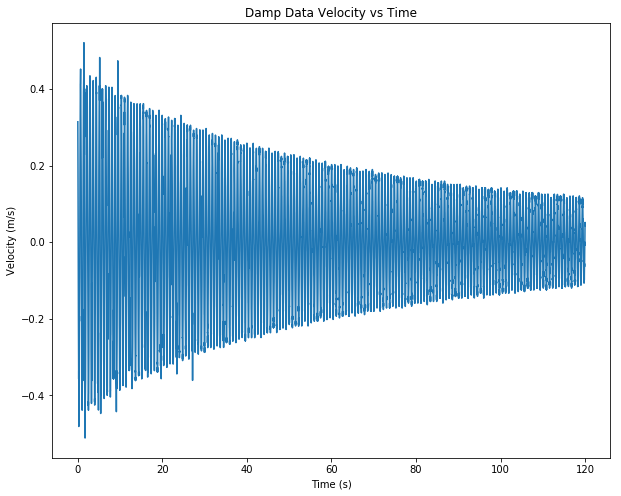

In [63]:
#Loading the damped velocity vs time experimental data
damp_data2 = np.loadtxt('damped velocity.txt', skiprows=2)
damp_t, damp_v = np.hsplit(damp_data2, 2)

#Setting figure size
plt.figure(figsize = (10, 8))

#Plotting velocity vs time for the damped experimental data
plt.plot(np.linspace(0., 120.0, damp_v.shape[0]), damp_v/100)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Damp Data Velocity vs Time')
plt.savefig('Real Damp Velocity vs Time')
plt.show()

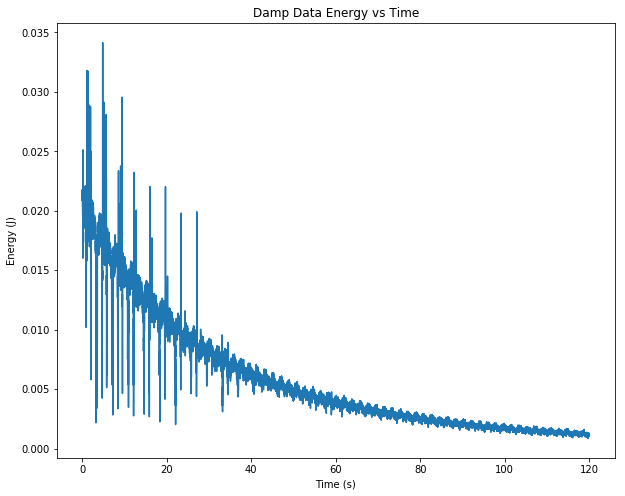

In [64]:
#Setting up the kinetic, potential and total energy for the real data
k_real_damp = 0.5*mass*((damp_v/100)**2)
u_real_damp = 0.5*k*(((damp_y-np.mean(damp_y))/100)**2)
e_real_damp = k_real_damp + u_real_damp

#Plotting Energy vs Time of the real dampened data
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0., 120.0, e_real_damp.shape[0]), e_real_damp)
plt.title("Damp Data Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.savefig('Real Damp Energy vs Time')
plt.show()